In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170498071/170498071 [00:05<00:00, 32245407.04it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


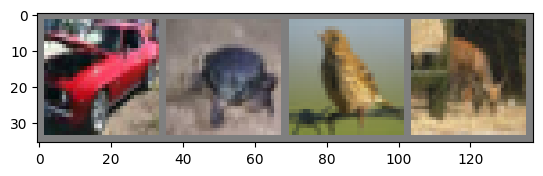

car   frog  bird  deer 


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 12, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(12, 32, 5)
        self.fc1 = nn.Linear(32 * 5 * 5, 240)  # Increased from 120 to 240
        self.fc2 = nn.Linear(240, 168)        # Increased from 84 to 168
        self.fc3 = nn.Linear(168, 10)
        self.leaky_relu = nn.LeakyReLU(0.1)  # Use Leaky ReLU with negative slope of 0.1

    def forward(self, x):
        x = self.pool(self.leaky_relu(self.conv1(x)))
        x = self.pool(self.leaky_relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = self.leaky_relu(self.fc1(x))
        x = self.leaky_relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [ ]:
for epoch in range(8):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.129
[1,  4000] loss: 1.725
[1,  6000] loss: 1.584
[1,  8000] loss: 1.461
[1, 10000] loss: 1.417
[1, 12000] loss: 1.326
[2,  2000] loss: 1.254
[2,  4000] loss: 1.209
[2,  6000] loss: 1.171
[2,  8000] loss: 1.143
[2, 10000] loss: 1.116
[2, 12000] loss: 1.117
[3,  2000] loss: 0.991
[3,  4000] loss: 1.005
[3,  6000] loss: 0.975
[3,  8000] loss: 0.979
[3, 10000] loss: 0.969
[3, 12000] loss: 0.970
[4,  2000] loss: 0.836
[4,  4000] loss: 0.833
[4,  6000] loss: 0.869
[4,  8000] loss: 0.857
[4, 10000] loss: 0.842
[4, 12000] loss: 0.866
[5,  2000] loss: 0.714
[5,  4000] loss: 0.753
[5,  6000] loss: 0.729
[5,  8000] loss: 0.774
[5, 10000] loss: 0.748
[5, 12000] loss: 0.784
[6,  2000] loss: 0.624
[6,  4000] loss: 0.626
[6,  6000] loss: 0.673
[6,  8000] loss: 0.679
[6, 10000] loss: 0.693
[6, 12000] loss: 0.677
[7,  2000] loss: 0.520
[7,  4000] loss: 0.576
[7,  6000] loss: 0.598
[7,  8000] loss: 0.610
[7, 10000] loss: 0.615
[7, 12000] loss: 0.621
[8,  2000] loss: 0.466
[8,  4000] 

In [ ]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

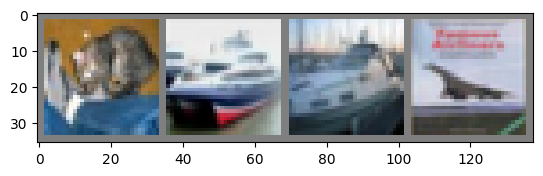

GroundTruth:  cat   ship  ship  plane


In [ ]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [ ]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [ ]:
outputs = net(images)

In [ ]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

Predicted:  cat   car   truck plane


In [ ]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 69 %


In [ ]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 78.8 %
Accuracy for class: car   is 84.5 %
Accuracy for class: bird  is 63.0 %
Accuracy for class: cat   is 46.1 %
Accuracy for class: deer  is 63.6 %
Accuracy for class: dog   is 50.9 %
Accuracy for class: frog  is 80.9 %
Accuracy for class: horse is 76.6 %
Accuracy for class: ship  is 73.7 %
Accuracy for class: truck is 75.6 %


In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cpu


In [ ]:
net.to(device)

Net(
  (conv1): Conv2d(3, 12, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(12, 32, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=800, out_features=240, bias=True)
  (fc2): Linear(in_features=240, out_features=168, bias=True)
  (fc3): Linear(in_features=168, out_features=10, bias=True)
  (leaky_relu): LeakyReLU(negative_slope=0.1)
)

In [ ]:
inputs, labels = data[0].to(device), data[1].to(device)

In [ ]:
del dataiter